In [1]:
import pandas as pd
import re
import string

# Step 1: Load the data
df = pd.read_csv("Datas.csv")  # Replace with your actual file name

# Step 2: Rename long columns to short labels
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
}

# Step 3: Define the cleaning function
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Remove emojis (extended unicode)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Step 4: Convert all emotion columns into one using melt
df_melted = df.melt(
    value_vars=['happy', 'sad', 'angry', 'fear'],
    var_name='emotion',
    value_name='text'
)

# Step 5: Remove empty/blank/NaN text entries
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Step 6: Apply the text cleaning
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# Step 7: Save the cleaned result
df_melted.to_csv("cleaned_emotions.csv", index=False)

# Step 8: View cleaned output (first 10 rows)
df_melted[['emotion', 'text', 'cleaned_text']].head(10)


SyntaxError: invalid syntax (2232015831.py, line 17)

In [2]:
import pandas as pd
import re
import string

# Step 1: Load the data
df = pd.read_csv("Datas.csv")  # Replace with your actual file name

# Step 2: Rename long columns to short labels
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
})

# Step 3: Define the cleaning function
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Remove emojis (extended unicode)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Step 4: Convert all emotion columns into one using melt
df_melted = df.melt(
    value_vars=['happy', 'sad', 'angry', 'fear'],
    var_name='emotion',
    value_name='text'
)

# Step 5: Remove empty/blank/NaN text entries
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Step 6: Apply the text cleaning
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# Step 7: Save the cleaned result
df_melted.to_csv("cleaned_emotions.csv", index=False)

# Step 8: View cleaned output (first 10 rows)
print(df_melted[['emotion', 'text', 'cleaned_text']].head(10))


  emotion                                               text  \
0   happy  My boyfriend spoke with me yesterday for more ...   
1   happy               When I eat and talk  with my mother.   
2   happy           When i remember my childhood experience.   
3   happy                                            Hshsjsj   
4   happy                                       I'm So Happy   
5   happy                 I am excited to see my exam result   
6   happy  If I felt happy I never express those through ...   
7   happy              I got my favourite food! So I'm happy   
8   happy                             I stay with my friends   
9   happy                            I was eating a icecream   

                                        cleaned_text  
0  my boyfriend spoke with me yesterday for more ...  
1                 when i eat and talk with my mother  
2            when i remember my childhood experience  
3                                            hshsjsj  
4                   

In [3]:
import pandas as pd
import re
import string

# Step 1: Load the data
df = pd.read_csv("Datas.csv")

# Step 2: Rename columns for easier handling
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
})

# Step 3: Define the clean_text function
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Remove emojis
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Step 4: Melt the dataset into two columns: text and emotion
df_melted = df.melt(
    value_vars=['happy', 'sad', 'angry', 'fear'],
    var_name='emotion',
    value_name='text'
)

# Step 5: Drop empty text entries
df_melted = df_melted.dropna(subset=['text'])

# Step 6: Apply text cleaning
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# Step 7: Save the final cleaned data
df_melted.to_csv("cleaned_emotions.csv", index=False)

# Optional: View result
df_melted.head()


,emotion,text,cleaned_text
0,happy,My boyfriend spoke with me yesterday for more ...,my boyfriend spoke with me yesterday for more ...
1,happy,When I eat and talk with my mother.,when i eat and talk with my mother
2,happy,When i remember my childhood experience.,when i remember my childhood experience
3,happy,Hshsjsj,hshsjsj
4,happy,I'm So Happy,im so happy


In [4]:
df

,Timestamp,Email Address,happy,sad,angry,fear
0,7/5/2025 18:42:09,sivapunniyamoorthysulojah@gmail.com,My boyfriend spoke with me yesterday for more ...,My puppy died last week... I feel sad.,My friends are talking gossip about me. I am s...,Yesterday I had a bad dream. I am so scared...
1,7/5/2025 19:42:58,ict2021133@as.rjt.ac.lk,When I eat and talk with my mother.,When I put all effects and study but i do not ...,When I'm working busy at same time others are ...,If i going alone to a place without my mother
2,7/5/2025 19:48:58,viniththap@gmail.com,When i remember my childhood experience.,I thought about my fast future aim... I feel s...,When my mother bought me more dresses to me.,When final examination result released.
3,7/5/2025 20:20:30,sivapunniyamoorthysulojah@gmail.com,Hshsjsj,Hshsjsks,Jsjdkdkd,NJ jsksk
4,7/5/2025 21:38:17,tharakarathnayake6@gmail.com,I'm So Happy,Too heavy ..,I'm so angry,I'm so scare
...,...,...,...,...,...,...
135,7/11/2025 15:32:44,uca.etn.f.2022.11@gmail.com,"""I finally completed my project and the teache...","""I really wanted to win the match, but we lost...","""My friend broke my trust and shared my secret...","""I have a presentation tomorrow and I’m really..."
136,7/11/2025 18:25:19,nivethihatheva@gmail.com,My boy friend surprised me with the beautiful ...,"I tried my best, but it still didn’t work out.",I’m really frustrated that no one is listening,What if I forget everything on stage?
137,7/12/2025 8:54:48,kamsaselva1010@gmail.com,When I get an appreciation from others,When my hard work becomes nothing,When someone gives too much of pressure to do ...,Fear to hear blame for something I done
138,7/12/2025 23:57:00,ahfuwais@gmail.com,I got pass marks for all subjects! So I'm very...,I can't attend the quiz on time... I feel very...,They disturbed me when I'm busy. I'm so angry!,I have to do my presentation well. I'm scared ...


In [6]:
df_melted.head()

,emotion,text,cleaned_text
0,happy,My boyfriend spoke with me yesterday for more ...,my boyfriend spoke with me yesterday for more ...
1,happy,When I eat and talk with my mother.,when i eat and talk with my mother
2,happy,When i remember my childhood experience.,when i remember my childhood experience
3,happy,Hshsjsj,hshsjsj
4,happy,I'm So Happy,im so happy


In [7]:
import pandas as pd
import re

# Function to check for gibberish-like patterns
def is_gibberish(text):
    text = str(text)
    # Match if:
    # - Too short (under 4 characters)
    # - Only repeated characters (like aaa, bbb)
    # - Only consonants and no vowels
    if len(text) < 4:
        return True
    if re.fullmatch(r'(.)\1{2,}', text):  # e.g., aaa, jjjj
        return True
    if not re.search(r'[aeiouAEIOU]', text):  # no vowels
        return True
    if re.search(r'(?:[a-zA-Z]){5,}', text) and not re.search(r'\s', text):  # long non-space word
        return True
    return False


In [8]:
# Remove rows where cleaned_text is gibberish
df_melted = df_melted[~df_melted['cleaned_text'].apply(is_gibberish)]


In [9]:
df_melted.head()

,emotion,text,cleaned_text
0,happy,My boyfriend spoke with me yesterday for more ...,my boyfriend spoke with me yesterday for more ...
1,happy,When I eat and talk with my mother.,when i eat and talk with my mother
2,happy,When i remember my childhood experience.,when i remember my childhood experience
4,happy,I'm So Happy,im so happy
5,happy,I am excited to see my exam result,i am excited to see my exam result


In [10]:
print(df_melted)

    emotion                                               text  \
0     happy  My boyfriend spoke with me yesterday for more ...   
1     happy               When I eat and talk  with my mother.   
2     happy           When i remember my childhood experience.   
4     happy                                       I'm So Happy   
5     happy                 I am excited to see my exam result   
..      ...                                                ...   
555    fear  "I have a presentation tomorrow and I’m really...   
556    fear              What if I forget everything on stage?   
557    fear            Fear to hear blame for something I done   
558    fear  I have to do my presentation well. I'm scared ...   
559    fear              I am really scared of the dark night.   

                                          cleaned_text  
0    my boyfriend spoke with me yesterday for more ...  
1                   when i eat and talk with my mother  
2              when i remember my ch

In [11]:
df

,Timestamp,Email Address,happy,sad,angry,fear
0,7/5/2025 18:42:09,sivapunniyamoorthysulojah@gmail.com,My boyfriend spoke with me yesterday for more ...,My puppy died last week... I feel sad.,My friends are talking gossip about me. I am s...,Yesterday I had a bad dream. I am so scared...
1,7/5/2025 19:42:58,ict2021133@as.rjt.ac.lk,When I eat and talk with my mother.,When I put all effects and study but i do not ...,When I'm working busy at same time others are ...,If i going alone to a place without my mother
2,7/5/2025 19:48:58,viniththap@gmail.com,When i remember my childhood experience.,I thought about my fast future aim... I feel s...,When my mother bought me more dresses to me.,When final examination result released.
3,7/5/2025 20:20:30,sivapunniyamoorthysulojah@gmail.com,Hshsjsj,Hshsjsks,Jsjdkdkd,NJ jsksk
4,7/5/2025 21:38:17,tharakarathnayake6@gmail.com,I'm So Happy,Too heavy ..,I'm so angry,I'm so scare
...,...,...,...,...,...,...
135,7/11/2025 15:32:44,uca.etn.f.2022.11@gmail.com,"""I finally completed my project and the teache...","""I really wanted to win the match, but we lost...","""My friend broke my trust and shared my secret...","""I have a presentation tomorrow and I’m really..."
136,7/11/2025 18:25:19,nivethihatheva@gmail.com,My boy friend surprised me with the beautiful ...,"I tried my best, but it still didn’t work out.",I’m really frustrated that no one is listening,What if I forget everything on stage?
137,7/12/2025 8:54:48,kamsaselva1010@gmail.com,When I get an appreciation from others,When my hard work becomes nothing,When someone gives too much of pressure to do ...,Fear to hear blame for something I done
138,7/12/2025 23:57:00,ahfuwais@gmail.com,I got pass marks for all subjects! So I'm very...,I can't attend the quiz on time... I feel very...,They disturbed me when I'm busy. I'm so angry!,I have to do my presentation well. I'm scared ...


In [12]:
import pandas as pd
import re
import string

# Step 1: Load the data
df = pd.read_csv("Datas.csv")  # Replace with your actual file path

# Step 2: Rename columns for easier handling
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
})

# Step 3: Define the clean_text function
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Remove emojis
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Step 4: Define function to detect gibberish-like text
def is_gibberish(text):
    text = str(text)
    # Too short texts
    if len(text) < 4:
        return True
    # Repeated same character 3 or more times
    if re.fullmatch(r'(.)\1{2,}', text):
        return True
    # No vowels present
    if not re.search(r'[aeiouAEIOU]', text):
        return True
    # Long word (5+ letters) without spaces might be gibberish
    if re.search(r'(?:[a-zA-Z]){5,}', text) and not re.search(r'\s', text):
        return True
    return False

# Step 5: Melt the dataframe to have emotion and text columns
df_melted = df.melt(
    value_vars=['happy', 'sad', 'angry', 'fear'],
    var_name='emotion',
    value_name='text'
)

# Step 6: Drop rows where text is empty or NaN
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Step 7: Clean the text
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# Step 8: Remove gibberish-like rows
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)
df_clean = df_melted[df_melted['is_gibberish'] == False].copy()

# Optional: Drop the helper gibberish column
df_clean.drop(columns=['is_gibberish'], inplace=True)

# Step 9: Save the cleaned, filtered dataset
df_clean.to_csv("cleaned_emotions_no_gibberish.csv", index=False)

# Step 10: Print the first 10 rows of cleaned data
print(df_clean[['emotion', 'text', 'cleaned_text']].head(10))


   emotion                                               text  \
0    happy  My boyfriend spoke with me yesterday for more ...   
1    happy               When I eat and talk  with my mother.   
2    happy           When i remember my childhood experience.   
4    happy                                       I'm So Happy   
5    happy                 I am excited to see my exam result   
6    happy  If I felt happy I never express those through ...   
7    happy              I got my favourite food! So I'm happy   
8    happy                             I stay with my friends   
9    happy                            I was eating a icecream   
10   happy  I went to the beach today! The sound of waves ...   

                                         cleaned_text  
0   my boyfriend spoke with me yesterday for more ...  
1                  when i eat and talk with my mother  
2             when i remember my childhood experience  
4                                         im so happy  
5   

In [13]:
# Total responses before cleaning (all non-null text entries)
total_responses = df_melted['text'].dropna().shape[0]

# Valid responses after preprocessing and filtering
valid_responses = df_clean.shape[0]

# Invalid responses = total - valid
invalid_responses = total_responses - valid_responses

print(f"Total Responses (original): {total_responses}")
print(f"Valid Responses (after preprocessing): {valid_responses}")
print(f"Invalid Responses (removed/filtered out): {invalid_responses}")


Total Responses (original): 560
Valid Responses (after preprocessing): 537
Invalid Responses (removed/filtered out): 23


In [14]:
# Total counts per emotion (non-null)
total_per_emotion = df_melted.dropna(subset=['text']).groupby('emotion').size()

# Valid counts per emotion
valid_per_emotion = df_clean.groupby('emotion').size()

# Invalid counts per emotion = difference
invalid_per_emotion = total_per_emotion - valid_per_emotion

print("Total Responses per Emotion:\n", total_per_emotion)
print("\nValid Responses per Emotion:\n", valid_per_emotion)
print("\nInvalid Responses per Emotion:\n", invalid_per_emotion)


Total Responses per Emotion:
 emotion
angry    140
fear     140
happy    140
sad      140
dtype: int64

Valid Responses per Emotion:
 emotion
angry    135
fear     136
happy    133
sad      133
dtype: int64

Invalid Responses per Emotion:
 emotion
angry    5
fear     4
happy    7
sad      7
dtype: int64


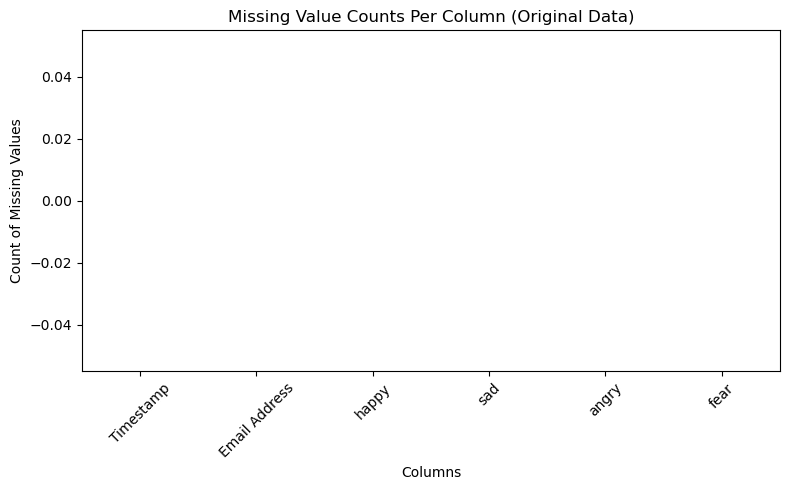

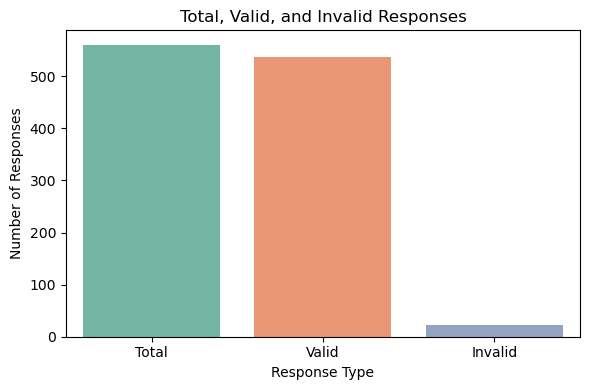

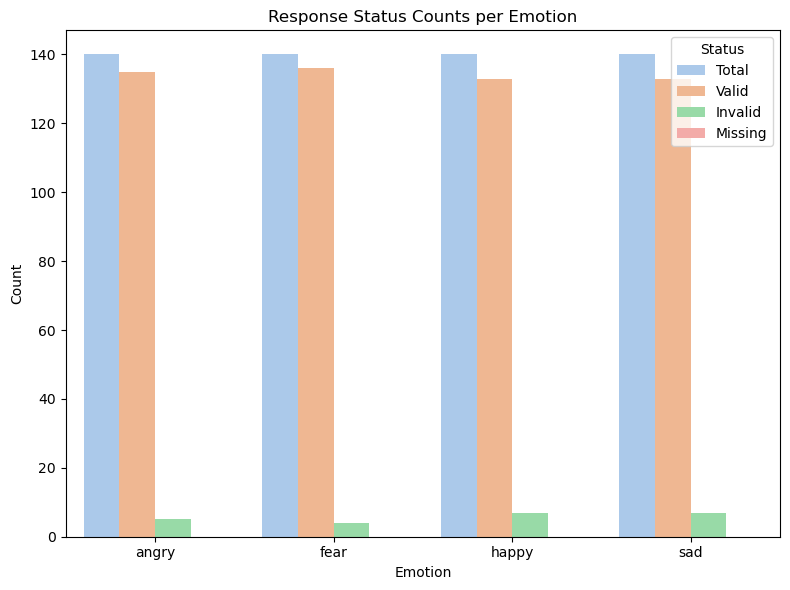

   emotion                                               text  \
0    happy  My boyfriend spoke with me yesterday for more ...   
1    happy               When I eat and talk  with my mother.   
2    happy           When i remember my childhood experience.   
4    happy                                       I'm So Happy   
5    happy                 I am excited to see my exam result   
6    happy  If I felt happy I never express those through ...   
7    happy              I got my favourite food! So I'm happy   
8    happy                             I stay with my friends   
9    happy                            I was eating a icecream   
10   happy  I went to the beach today! The sound of waves ...   

                                         cleaned_text  
0   my boyfriend spoke with me yesterday for more ...  
1                  when i eat and talk with my mother  
2             when i remember my childhood experience  
4                                         im so happy  
5   

In [17]:
import pandas as pd
import re
import string

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the data
df = pd.read_csv("Datas.csv")  # Replace with your file name

# Step 2: Rename columns for consistency
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
})

# Step 3: Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Step 4: Gibberish detection function
def is_gibberish(text):
    text = str(text)
    if len(text) < 4:
        return True
    if re.fullmatch(r'(.)\1{2,}', text):
        return True
    if not re.search(r'[aeiouAEIOU]', text):
        return True
    if re.search(r'(?:[a-zA-Z]){5,}', text) and not re.search(r'\s', text):
        return True
    return False

# Step 5: Melt to long format
df_melted = df.melt(value_vars=['happy', 'sad', 'angry', 'fear'],
                    var_name='emotion',
                    value_name='text')

# Step 6: Drop empty or NaN
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Step 7: Clean text
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# Step 8: Remove gibberish
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)
df_clean = df_melted[df_melted['is_gibberish'] == False].copy()
df_clean.drop(columns=['is_gibberish'], inplace=True)

# Step 9: Tokenization
MAX_NUM_WORDS = 5000
MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_clean['cleaned_text'])

# Convert text to sequences
df_clean['token_sequence'] = tokenizer.texts_to_sequences(df_clean['cleaned_text'])

# Padding
padded_sequences = pad_sequences(df_clean['token_sequence'], maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
df_clean['padded_sequence'] = padded_sequences.tolist()

# Step 10: Encode emotion labels
label_encoder = LabelEncoder()
df_clean['emotion_label'] = label_encoder.fit_transform(df_clean['emotion'])

# Step 11: Final features and labels
X = padded_sequences  # Input features
y = df_clean['emotion_label'].values  # Output labels

# Step 12: Show final data
print("\nSample cleaned & transformed data:")
print(df_clean[['emotion', 'emotion_label', 'cleaned_text', 'token_sequence', 'padded_sequence']].head())

# Step 13: Save cleaned data
df_clean.to_csv("final_preprocessed_emotions.csv", index=False)

# Optional: Show label mapping
print("\nLabel Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i} → {label}")



Sample cleaned & transformed data:
  emotion  emotion_label                                       cleaned_text  \
0   happy              2  my boyfriend spoke with me yesterday for more ...   
1   happy              2                 when i eat and talk with my mother   
2   happy              2            when i remember my childhood experience   
4   happy              2                                        im so happy   
5   happy              2                 i am excited to see my exam result   

                                      token_sequence  \
0  [3, 154, 182, 38, 10, 227, 17, 183, 184, 441, ...   
1                     [9, 2, 301, 7, 116, 38, 3, 90]   
2                           [9, 2, 302, 3, 442, 443]   
4                                         [5, 4, 12]   
5                    [2, 18, 132, 6, 91, 3, 35, 133]   

                                     padded_sequence  
0  [3, 154, 182, 38, 10, 227, 17, 183, 184, 441, ...  
1  [9, 2, 301, 7, 116, 38, 3, 90, 0, 0, 0,

In [18]:
import pandas as pd
import re
import string

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.corpus import stopwords

# Only download stopwords if not already downloaded
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

# Step 1: Load the data
df = pd.read_csv("Datas.csv")  # Replace with your file name

# Step 2: Rename columns for consistency
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
})

# Step 3: Clean text function with stop words removal
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Remove emojis
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    
    # Remove stop words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Step 4: Gibberish detection function
def is_gibberish(text):
    text = str(text)
    if len(text) < 4:
        return True
    if re.fullmatch(r'(.)\1{2,}', text):
        return True
    if not re.search(r'[aeiouAEIOU]', text):
        return True
    if re.search(r'(?:[a-zA-Z]){5,}', text) and not re.search(r'\s', text):
        return True
    return False

# Step 5: Melt to long format
df_melted = df.melt(value_vars=['happy', 'sad', 'angry', 'fear'],
                    var_name='emotion',
                    value_name='text')

# Step 6: Drop empty or NaN
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Step 7: Clean text
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# Step 8: Remove gibberish
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)
df_clean = df_melted[df_melted['is_gibberish'] == False].copy()
df_clean.drop(columns=['is_gibberish'], inplace=True)

# Step 9: Tokenization
MAX_NUM_WORDS = 5000
MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_clean['cleaned_text'])

# Convert text to sequences
df_clean['token_sequence'] = tokenizer.texts_to_sequences(df_clean['cleaned_text'])

# Padding
padded_sequences = pad_sequences(df_clean['token_sequence'], maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
df_clean['padded_sequence'] = padded_sequences.tolist()

# Step 10: Encode emotion labels
label_encoder = LabelEncoder()
df_clean['emotion_label'] = label_encoder.fit_transform(df_clean['emotion'])

# Step 11: Final features and labels
X = padded_sequences  # Input features
y = df_clean['emotion_label'].values  # Output labels

# Step 12: Show final data
print("\nSample cleaned & transformed data:")
print(df_clean[['emotion', 'emotion_label', 'cleaned_text', 'token_sequence', 'padded_sequence']].head())

# Step 13: Save cleaned data
df_clean.to_csv("final_preprocessed_emotions.csv", index=False)

# Optional: Show label mapping
print("\nLabel Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{i} → {label}")



Sample cleaned & transformed data:
  emotion  emotion_label                               cleaned_text  \
0   happy              2  boyfriend spoke yesterday hour feel happy   
1   happy              2                            eat talk mother   
2   happy              2              remember childhood experience   
4   happy              2                                   im happy   
5   happy              2                    excited see exam result   

               token_sequence  \
0  [100, 124, 159, 351, 5, 3]   
1               [223, 69, 47]   
2             [224, 352, 353]   
4                      [2, 3]   
5            [81, 48, 14, 82]   

                                     padded_sequence  
0  [100, 124, 159, 351, 5, 3, 0, 0, 0, 0, 0, 0, 0...  
1  [223, 69, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2  [224, 352, 353, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5  [81, 48, 14, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  

Label M

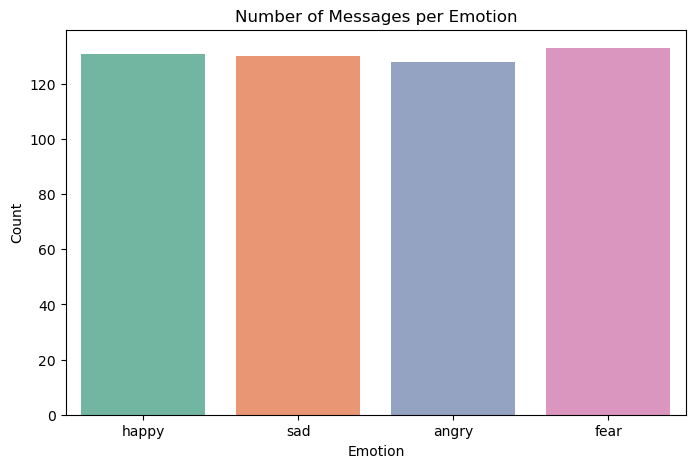

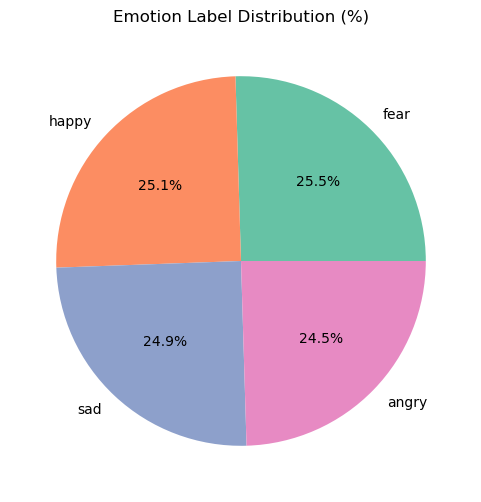

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Number of samples per emotion
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='emotion', palette='Set2')
plt.title("Number of Messages per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# Pie chart: Percentage distribution of emotion labels
label_counts = df_clean['emotion'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Emotion Label Distribution (%)")
plt.show()


In [16]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nlpaug.augmenter.word as naw  # For augmentation

# Download stopwords if not already
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv("Datas.csv")

# Rename columns
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
})

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Detect gibberish
def is_gibberish(text):
    text = str(text)
    if len(text) < 4:
        return True
    if re.fullmatch(r'(.)\1{2,}', text):
        return True
    if not re.search(r'[aeiouAEIOU]', text):
        return True
    if re.search(r'(?:[a-zA-Z]){5,}', text) and not re.search(r'\s', text):
        return True
    return False

# Melt dataframe
df_melted = df.melt(value_vars=['happy', 'sad', 'angry', 'fear'],
                    var_name='emotion',
                    value_name='text')

# Drop empty or NaN
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Clean and remove gibberish
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)
df_clean = df_melted[df_melted['is_gibberish'] == False].copy()
df_clean.drop(columns=['is_gibberish'], inplace=True)

# ======================
# AUGMENTATION SECTION
# ======================
augmenter = naw.SynonymAug(aug_src='wordnet')  # Basic synonym augmenter

augmented_texts = []
augmented_emotions = []

for index, row in df_clean.iterrows():
    original_text = row['cleaned_text']
    emotion = row['emotion']
    try:
        augmented = augmenter.augment(original_text)
        if isinstance(augmented, list):
            augmented_texts.extend(augmented)
            augmented_emotions.extend([emotion]*len(augmented))
        else:
            augmented_texts.append(augmented)
            augmented_emotions.append(emotion)
    except Exception:
        continue

# Create DataFrame for augmented data
df_aug = pd.DataFrame({
    'emotion': augmented_emotions,
    'cleaned_text': augmented_texts
})

# Combine original + augmented
df_combined = pd.concat([df_clean[['emotion', 'cleaned_text']], df_aug], ignore_index=True)

# ======================
# Tokenization + Padding
# ======================
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_combined['cleaned_text'])

df_combined['token_sequence'] = tokenizer.texts_to_sequences(df_combined['cleaned_text'])

padded_sequences = pad_sequences(df_combined['token_sequence'], maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
df_combined['padded_sequence'] = padded_sequences.tolist()

# ======================
# One-hot Encoding
# ======================
one_hot_labels = pd.get_dummies(df_combined['emotion'], prefix='emotion')
df_combined = pd.concat([df_combined, one_hot_labels], axis=1)

X = padded_sequences
y = one_hot_labels.values

# ======================
# Save and Preview
# ======================
df_combined.to_csv("final_augmented_emotions_onehot.csv", index=False)

print("\nSample cleaned & augmented data:")
print(df_combined[['emotion', 'cleaned_text', 'token_sequence', 'padded_sequence']+ list(one_hot_labels.columns) ].head())

print("\nOne-hot columns:", list(one_hot_labels.columns))



Sample cleaned & augmented data:
  emotion                               cleaned_text  \
0   happy  boyfriend spoke yesterday hour feel happy   
1   happy                            eat talk mother   
2   happy              remember childhood experience   
3   happy                                   im happy   
4   happy                    excited see exam result   

               token_sequence  \
0  [100, 125, 165, 854, 4, 5]   
1               [166, 68, 50]   
2             [324, 424, 167]   
3                      [2, 5]   
4           [147, 46, 13, 77]   

                                     padded_sequence  emotion_angry  \
0  [100, 125, 165, 854, 4, 5, 0, 0, 0, 0, 0, 0, 0...              0   
1  [166, 68, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...              0   
2  [324, 424, 167, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
3  [2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
4  [147, 46, 13, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...              0   

   

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Parameters
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100  # embedding vector size
num_classes = y.shape[1]  # number of emotion classes

# Build model
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.summary()

# Train model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           250000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 338,740
Trainable params: 338,740
Non-trainable params: 0
__________________________________________________

In [3]:
# Melt dataframe (your existing step)
df_melted = df.melt(value_vars=['happy', 'sad', 'angry', 'fear'],
                    var_name='emotion',
                    value_name='text')

# Drop empty or NaN and empty strings
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# BEFORE preprocessing counts
total_before = len(df_melted)
empty_before = df_melted['text'].str.strip().eq('').sum()
print(f"Total samples BEFORE preprocessing: {total_before}")
print(f"Empty or blank samples BEFORE preprocessing: {empty_before}")
print(f"Valid samples BEFORE preprocessing (non-empty): {total_before - empty_before}")
print(f"Invalid samples BEFORE preprocessing (empty): {empty_before}")

# AFTER preprocessing
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# Count empty after cleaning
empty_after = df_melted['cleaned_text'].str.strip().eq('').sum()

# Detect gibberish after cleaning
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)

# Valid and invalid after cleaning
valid_after = df_melted[(df_melted['cleaned_text'].str.strip() != '') & (df_melted['is_gibberish'] == False)]
invalid_after = df_melted[(df_melted['cleaned_text'].str.strip() == '') | (df_melted['is_gibberish'] == True)]

print(f"\nTotal samples AFTER preprocessing: {len(df_melted)}")
print(f"Empty or blank samples AFTER preprocessing: {empty_after}")
print(f"Valid samples AFTER preprocessing (non-empty + non-gibberish): {len(valid_after)}")
print(f"Invalid samples AFTER preprocessing (empty or gibberish): {len(invalid_after)}")


Total samples BEFORE preprocessing: 560
Empty or blank samples BEFORE preprocessing: 0
Valid samples BEFORE preprocessing (non-empty): 560
Invalid samples BEFORE preprocessing (empty): 0

Total samples AFTER preprocessing: 560
Empty or blank samples AFTER preprocessing: 5
Valid samples AFTER preprocessing (non-empty + non-gibberish): 522
Invalid samples AFTER preprocessing (empty or gibberish): 38


In [10]:
# Model parameters and training config
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100
NUM_CLASSES = y.shape[1]

# Training hyperparameters
BATCH_SIZE = 32
EPOCHS = 10
DROPOUT_RATE = 0.5
OPTIMIZER = 'Adam (learning_rate=0.001)'
LOSS_FUNCTION = 'categorical_crossentropy'

# Model architecture info
num_layers = 4  # Embedding, Bidirectional LSTM, Dropout, Dense layers (excluding output layer)
neurons_per_layer = {
    'Embedding': EMBEDDING_DIM,
    'Bidirectional LSTM': 64 * 2,  # BiLSTM has 64 units in each direction, total 128 outputs internally
    'Dropout': '0.5 (rate)',
    'Dense (hidden)': 32,
    'Dense (output)': NUM_CLASSES
}

print("=== Model Summary ===")
print(f"Number of Layers (excluding output layer): {num_layers}")
print(f"Neurons per Layer:")
for layer, neurons in neurons_per_layer.items():
    print(f" - {layer}: {neurons}")
print(f"Optimizer: {OPTIMIZER}")
print(f"Loss Function: {LOSS_FUNCTION}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print(f"Dropout Rate: {DROPOUT_RATE}")
print(f"Embedding Dimension: {EMBEDDING_DIM}")


=== Model Summary ===
Number of Layers (excluding output layer): 4
Neurons per Layer:
 - Embedding: 100
 - Bidirectional LSTM: 128
 - Dropout: 0.5 (rate)
 - Dense (hidden): 32
 - Dense (output): 4
Optimizer: Adam (learning_rate=0.001)
Loss Function: categorical_crossentropy
Batch Size: 32
Epochs: 10
Dropout Rate: 0.5
Embedding Dimension: 100


In [6]:
def predict_emotion(user_text, model, tokenizer, max_seq_len=20):
    cleaned = clean_text(user_text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_seq_len, padding='post', truncating='post')
    pred_probs = model.predict(padded)
    pred_index = pred_probs.argmax(axis=1)[0]
    labels = list(one_hot_labels.columns)
    predicted_emotion = labels[pred_index].replace('emotion_', '')
    confidence = pred_probs[0][pred_index]
    return predicted_emotion, confidence

# Collect 4 user inputs
user_texts = []
for i in range(4):
    text = input(f"Enter text message {i+1}: ")
    user_texts.append(text)

# Predict for each input
for i, text in enumerate(user_texts):
    emotion, conf = predict_emotion(text, model, tokenizer, MAX_SEQUENCE_LENGTH)
    print(f"\nInput {i+1}: {text}")
    print(f"Predicted Emotion: {emotion} with confidence {conf:.2f}")


Enter text message 1: I talk with my family members 
Enter text message 2: I miss my friends 
Enter text message 3: While cheating me 
Enter text message 4: I have a exam next week 
1/1 [==============================] - 1s 643ms/step

Input 1: I talk with my family members 
Predicted Emotion: happy with confidence 0.98
1/1 [==============================] - 0s 27ms/step

Input 2: I miss my friends 
Predicted Emotion: sad with confidence 0.89
1/1 [==============================] - 0s 17ms/step

Input 3: While cheating me 
Predicted Emotion: fear with confidence 0.87
1/1 [==============================] - 0s 23ms/step

Input 4: I have a exam next week 
Predicted Emotion: fear with confidence 0.99


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# 1. Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 3. Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

# 4. Predict classes on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 5. Classification report
target_names = [col.replace('emotion_', '') for col in one_hot_labels.columns]
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=target_names))


Epoch 1/10
24/24 [==============================] - 1s 58ms/step - loss: 0.0800 - accuracy: 0.9787 - val_loss: 0.0634 - val_accuracy: 0.9881
Epoch 2/10
24/24 [==============================] - 1s 53ms/step - loss: 0.0443 - accuracy: 0.9920 - val_loss: 0.0765 - val_accuracy: 0.9881
Epoch 3/10
24/24 [==============================] - 1s 56ms/step - loss: 0.0171 - accuracy: 0.9960 - val_loss: 0.0600 - val_accuracy: 0.9881
Epoch 4/10
24/24 [==============================] - 1s 54ms/step - loss: 0.0133 - accuracy: 0.9973 - val_loss: 0.0961 - val_accuracy: 0.9643
Epoch 5/10
24/24 [==============================] - 1s 57ms/step - loss: 0.0153 - accuracy: 0.9973 - val_loss: 0.0665 - val_accuracy: 0.9881
Epoch 6/10
24/24 [==============================] - 1s 58ms/step - loss: 0.0145 - accuracy: 0.9973 - val_loss: 0.0596 - val_accuracy: 0.9881
Epoch 7/10
24/24 [==============================] - 1s 56ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0745 - val_accuracy: 0.9881
Epoch 8/10
24

In [9]:
# Count total samples
total_samples = len(df_combined)
print(f"Total samples in dataset: {total_samples}")

# Count samples per emotion class
print("\nSamples per emotion class:")
print(df_combined['emotion'].value_counts())

# After splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nNumber of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

# Optional: count samples per class in train and test sets
import numpy as np

# Decode one-hot back to class indices for train and test
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nTraining samples per class:")
for i, label in enumerate([col.replace('emotion_', '') for col in one_hot_labels.columns]):
    print(f" {label}: {(y_train_classes == i).sum()}")

print("\nTesting samples per class:")
for i, label in enumerate([col.replace('emotion_', '') for col in one_hot_labels.columns]):
    print(f" {label}: {(y_test_classes == i).sum()}")


Total samples in dataset: 1044

Samples per emotion class:
fear     266
happy    262
sad      260
angry    256
Name: emotion, dtype: int64

Number of training samples: 835
Number of testing samples: 209

Training samples per class:
 angry: 200
 fear: 214
 happy: 203
 sad: 218

Testing samples per class:
 angry: 56
 fear: 52
 happy: 59
 sad: 42


In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Predict classes on test data
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, F1-score (macro average)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")


7/7 [==============================] - 0s 3ms/step
Accuracy: 0.8852
Precision (macro): 0.8861
Recall (macro): 0.8866
F1-score (macro): 0.8804


Epoch 1/10
24/24 [==============================] - 1s 53ms/step - loss: 0.0258 - accuracy: 0.9960 - val_loss: 0.6332 - val_accuracy: 0.8095
Epoch 2/10
24/24 [==============================] - 1s 51ms/step - loss: 0.0194 - accuracy: 0.9987 - val_loss: 0.6850 - val_accuracy: 0.8095
Epoch 3/10
24/24 [==============================] - 1s 59ms/step - loss: 0.0208 - accuracy: 0.9960 - val_loss: 0.7232 - val_accuracy: 0.8214
Epoch 4/10
24/24 [==============================] - 1s 53ms/step - loss: 0.0089 - accuracy: 0.9987 - val_loss: 0.6763 - val_accuracy: 0.8333
Epoch 5/10
24/24 [==============================] - 1s 52ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.7157 - val_accuracy: 0.8333
Epoch 6/10
24/24 [==============================] - 1s 51ms/step - loss: 0.0153 - accuracy: 0.9987 - val_loss: 0.7039 - val_accuracy: 0.7976
Epoch 7/10
24/24 [==============================] - 1s 57ms/step - loss: 0.0180 - accuracy: 0.9960 - val_loss: 0.8109 - val_accuracy: 0.8095
Epoch 8/10
24

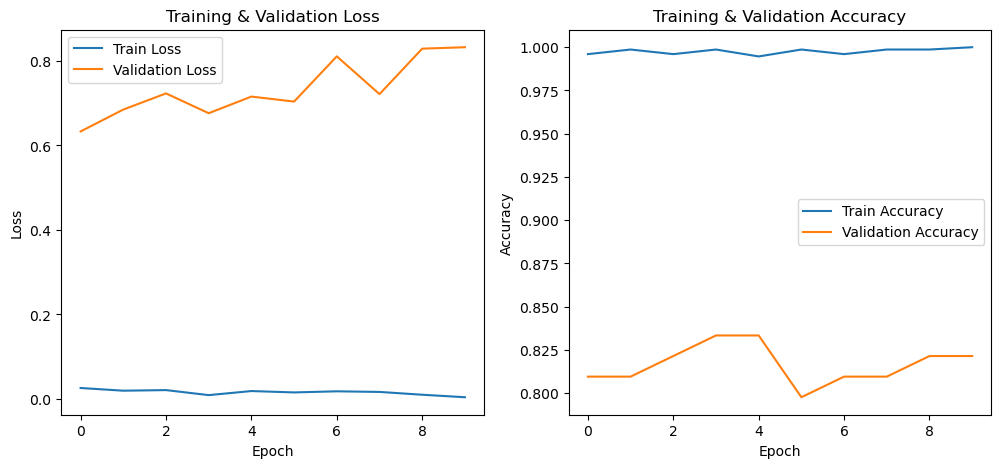

In [11]:
import matplotlib.pyplot as plt

# Train the model and save history
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.1)

# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [13]:
# Total samples
total_samples = len(df_combined)
print(f"Total samples in dataset: {total_samples}")

# Samples per emotion class - counts and percentages
print("\nSamples per emotion class:")
emotion_counts = df_combined['emotion'].value_counts()
emotion_percent = df_combined['emotion'].value_counts(normalize=True) * 100
for emotion, count in emotion_counts.items():
    print(f" {emotion}: {count} ({emotion_percent[emotion]:.2f}%)")

# After splitting
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nNumber of training samples: {len(X_train)} ({(len(X_train) / total_samples) * 100:.2f}%)")
print(f"Number of testing samples: {len(X_test)} ({(len(X_test) / total_samples) * 100:.2f}%)")

# Decode one-hot back to class indices for train and test
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Get emotion labels from one_hot_labels columns
emotion_labels = [col.replace('emotion_', '') for col in one_hot_labels.columns]

# Training samples per class with percentage
print("\nTraining samples per class:")
for i, label in enumerate(emotion_labels):
    count = (y_train_classes == i).sum()
    percentage = (count / len(y_train)) * 100
    print(f" {label}: {count} ({percentage:.2f}%)")

# Testing samples per class with percentage
print("\nTesting samples per class:")
for i, label in enumerate(emotion_labels):
    count = (y_test_classes == i).sum()
    percentage = (count / len(y_test)) * 100
    print(f" {label}: {count} ({percentage:.2f}%)")


Total samples in dataset: 1044

Samples per emotion class:
 fear: 266 (25.48%)
 happy: 262 (25.10%)
 sad: 260 (24.90%)
 angry: 256 (24.52%)

Number of training samples: 835 (79.98%)
Number of testing samples: 209 (20.02%)

Training samples per class:
 angry: 200 (23.95%)
 fear: 214 (25.63%)
 happy: 203 (24.31%)
 sad: 218 (26.11%)

Testing samples per class:
 angry: 56 (26.79%)
 fear: 52 (24.88%)
 happy: 59 (28.23%)
 sad: 42 (20.10%)


Epoch 1/10
27/27 [==============================] - 1s 23ms/step - loss: 0.0299 - accuracy: 0.9916 - val_loss: 0.2776 - val_accuracy: 0.9091
Epoch 2/10
27/27 [==============================] - 1s 23ms/step - loss: 0.0286 - accuracy: 0.9952 - val_loss: 0.1996 - val_accuracy: 0.9330
Epoch 3/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0176 - accuracy: 0.9976 - val_loss: 0.2390 - val_accuracy: 0.9234
Epoch 4/10
27/27 [==============================] - 1s 25ms/step - loss: 0.0147 - accuracy: 0.9964 - val_loss: 0.2076 - val_accuracy: 0.9330
Epoch 5/10
27/27 [==============================] - 1s 23ms/step - loss: 0.0142 - accuracy: 0.9988 - val_loss: 0.1926 - val_accuracy: 0.9378
Epoch 6/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 0.2800 - val_accuracy: 0.9139
Epoch 7/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.2887 - val_accuracy: 0.9234
Epoch 8/10
27

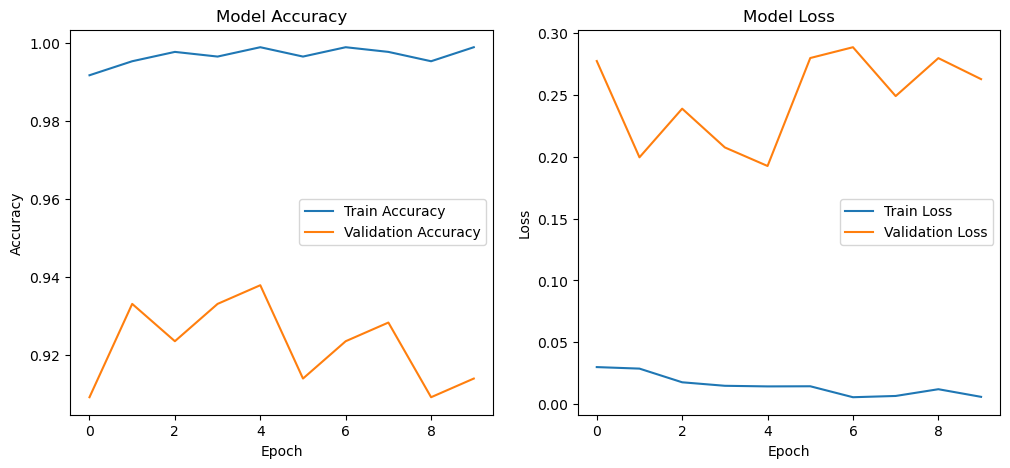

In [12]:
def predict_emotion(user_text, model, tokenizer, max_seq_len=20):
    cleaned = clean_text(user_text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_seq_len, padding='post', truncating='post')
    pred_probs = model.predict(padded)
    pred_index = pred_probs.argmax(axis=1)[0]
    labels = list(one_hot_labels.columns)
    predicted_emotion = labels[pred_index].replace('emotion_', '')
    confidence = pred_probs[0][pred_index]
    return predicted_emotion, confidence

# Collect 4 user inputs
user_texts = []
for i in range(4):
    text = input(f"Enter text message {i+1}: ")
    user_texts.append(text)

# Predict for each input
for i, text in enumerate(user_texts):
    emotion, conf = predict_emotion(text, model, tokenizer, MAX_SEQUENCE_LENGTH)
    print(f"\nInput {i+1}: {text}")
    print(f"Predicted Emotion: {emotion} with confidence {conf:.2f}")


Enter text message 1: i am feeling unlucky
Enter text message 2: i am feeling unlucky
Enter text message 3: i am feeling unlucky
Enter text message 4: i am feeling unlucky
1/1 [==============================] - 1s 1s/step

Input 1: i am feeling unlucky
Predicted Emotion: sad with confidence 0.79
1/1 [==============================] - 0s 37ms/step

Input 2: i am feeling unlucky
Predicted Emotion: sad with confidence 0.79
1/1 [==============================] - 0s 33ms/step

Input 3: i am feeling unlucky
Predicted Emotion: sad with confidence 0.79
1/1 [==============================] - 0s 32ms/step

Input 4: i am feeling unlucky
Predicted Emotion: sad with confidence 0.79


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100
num_classes = y.shape[1]

# Build model
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(32)))  # reduced from 64
model.add(Dropout(0.6))  # increased dropout
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
optimizer = Adam(learning_rate=0.0005)  # reduced learning rate
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop])


Epoch 1/30
27/27 [==============================] - 8s 67ms/step - loss: 1.3807 - accuracy: 0.2455 - val_loss: 1.4672 - val_accuracy: 0.0000e+00
Epoch 2/30
27/27 [==============================] - 0s 18ms/step - loss: 1.3571 - accuracy: 0.3533 - val_loss: 1.5378 - val_accuracy: 0.0000e+00
Epoch 3/30
27/27 [==============================] - 1s 22ms/step - loss: 1.3338 - accuracy: 0.3868 - val_loss: 1.5958 - val_accuracy: 0.0000e+00
Epoch 4/30
27/27 [==============================] - 0s 17ms/step - loss: 1.2904 - accuracy: 0.4802 - val_loss: 1.5849 - val_accuracy: 0.0096


In [14]:
# Melt dataframe (your existing step)
df_melted = df.melt(value_vars=['happy', 'sad', 'angry', 'fear'],
                    var_name='emotion',
                    value_name='text')

# Drop empty or NaN and empty strings
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# BEFORE preprocessing counts
total_before = len(df_melted)
empty_before = df_melted['text'].str.strip().eq('').sum()
print(f"Total samples BEFORE preprocessing: {total_before}")
print(f"Empty or blank samples BEFORE preprocessing: {empty_before}")
print(f"Valid samples BEFORE preprocessing (non-empty): {total_before - empty_before}")
print(f"Invalid samples BEFORE preprocessing (empty): {empty_before}")

# AFTER preprocessing
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)

# Count empty after cleaning
empty_after = df_melted['cleaned_text'].str.strip().eq('').sum()

# Detect gibberish after cleaning
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)

# Valid and invalid after cleaning
valid_after = df_melted[(df_melted['cleaned_text'].str.strip() != '') & (df_melted['is_gibberish'] == False)]
invalid_after = df_melted[(df_melted['cleaned_text'].str.strip() == '') | (df_melted['is_gibberish'] == True)]

print(f"\nTotal samples AFTER preprocessing: {len(df_melted)}")
print(f"Empty or blank samples AFTER preprocessing: {empty_after}")
print(f"Valid samples AFTER preprocessing (non-empty + non-gibberish): {len(valid_after)}")
print(f"Invalid samples AFTER preprocessing (empty or gibberish): {len(invalid_after)}")


Total samples BEFORE preprocessing: 560
Empty or blank samples BEFORE preprocessing: 0
Valid samples BEFORE preprocessing (non-empty): 560
Invalid samples BEFORE preprocessing (empty): 0

Total samples AFTER preprocessing: 560
Empty or blank samples AFTER preprocessing: 5
Valid samples AFTER preprocessing (non-empty + non-gibberish): 522
Invalid samples AFTER preprocessing (empty or gibberish): 38


In [15]:
# Model parameters and training config
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100
NUM_CLASSES = y.shape[1]

# Training hyperparameters
BATCH_SIZE = 32
EPOCHS = 10
DROPOUT_RATE = 0.5
OPTIMIZER = 'Adam (learning_rate=0.001)'
LOSS_FUNCTION = 'categorical_crossentropy'

# Model architecture info
num_layers = 4  # Embedding, Bidirectional LSTM, Dropout, Dense layers (excluding output layer)
neurons_per_layer = {
    'Embedding': EMBEDDING_DIM,
    'Bidirectional LSTM': 64 * 2,  # BiLSTM has 64 units in each direction, total 128 outputs internally
    'Dropout': '0.5 (rate)',
    'Dense (hidden)': 32,
    'Dense (output)': NUM_CLASSES
}

print("=== Model Summary ===")
print(f"Number of Layers (excluding output layer): {num_layers}")
print(f"Neurons per Layer:")
for layer, neurons in neurons_per_layer.items():
    print(f" - {layer}: {neurons}")
print(f"Optimizer: {OPTIMIZER}")
print(f"Loss Function: {LOSS_FUNCTION}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print(f"Dropout Rate: {DROPOUT_RATE}")
print(f"Embedding Dimension: {EMBEDDING_DIM}")


=== Model Summary ===
Number of Layers (excluding output layer): 4
Neurons per Layer:
 - Embedding: 100
 - Bidirectional LSTM: 128
 - Dropout: 0.5 (rate)
 - Dense (hidden): 32
 - Dense (output): 4
Optimizer: Adam (learning_rate=0.001)
Loss Function: categorical_crossentropy
Batch Size: 32
Epochs: 10
Dropout Rate: 0.5
Embedding Dimension: 100


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Model & Training Parameters ===
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100
DROPOUT_RATE = 0.5
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001

# === One-hot classes ===
NUM_CLASSES = y.shape[1]  # y must be one-hot encoded

# === Split the data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Build the Model ===
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(64)))  # 64 units each direction → 128 outputs total
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(32, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# === Compile the Model ===
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# === Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# === Train the Model ===
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[early_stop])

# === Evaluate the Model ===
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# === Compute Metrics ===
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# === Print Results ===
print("\n=== Model Evaluation Metrics ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_true_classes, y_pred_classes))


Epoch 1/10
21/21 [==============================] - 7s 84ms/step - loss: 1.3826 - accuracy: 0.2859 - val_loss: 1.3751 - val_accuracy: 0.3114
Epoch 2/10
21/21 [==============================] - 1s 24ms/step - loss: 1.3525 - accuracy: 0.4341 - val_loss: 1.3254 - val_accuracy: 0.4970
Epoch 3/10
21/21 [==============================] - 0s 23ms/step - loss: 1.1943 - accuracy: 0.5778 - val_loss: 1.1100 - val_accuracy: 0.6108
Epoch 4/10
21/21 [==============================] - 0s 23ms/step - loss: 0.9034 - accuracy: 0.6991 - val_loss: 0.8491 - val_accuracy: 0.6527
Epoch 5/10
21/21 [==============================] - 0s 22ms/step - loss: 0.5113 - accuracy: 0.8638 - val_loss: 0.5811 - val_accuracy: 0.7964
Epoch 6/10
21/21 [==============================] - 0s 23ms/step - loss: 0.2265 - accuracy: 0.9326 - val_loss: 0.4455 - val_accuracy: 0.8563
Epoch 7/10
21/21 [==============================] - 0s 22ms/step - loss: 0.1416 - accuracy: 0.9641 - val_loss: 0.4271 - val_accuracy: 0.8563
Epoch 8/10
21

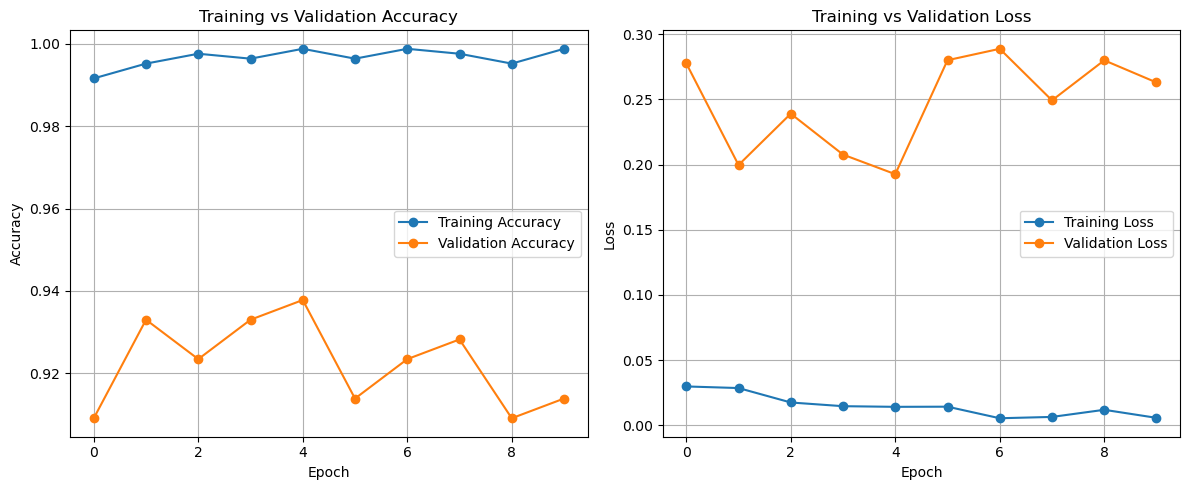

In [20]:
import matplotlib.pyplot as plt

# history = model.fit(...)   # already done earlier

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Model & Training Parameters ===
MAX_NUM_WORDS = 2500
MAX_SEQUENCE_LENGTH = 20
EMBEDDING_DIM = 100
DROPOUT_RATE = 0.5
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001

# === One-hot classes ===
NUM_CLASSES = y.shape[1]  # y must be one-hot encoded

# === Split the data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Build the Model ===
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(64)))  # 64 units each direction → 128 outputs total
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(32, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# === Compile the Model ===
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# === Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# === Train the Model ===
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[early_stop])

# === Evaluate the Model ===
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# === Compute Metrics ===
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# === Print Results ===
print("\n=== Model Evaluation Metrics ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_true_classes, y_pred_classes))


NameError: name 'y' is not defined

In [5]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nlpaug.augmenter.word as naw  # For augmentation

# Download stopwords if not already
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv("Datas.csv")

# Rename columns
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
})

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Detect gibberish
def is_gibberish(text):
    text = str(text)
    if len(text) < 4:
        return True
    if re.fullmatch(r'(.)\1{2,}', text):
        return True
    if not re.search(r'[aeiouAEIOU]', text):
        return True
    if re.search(r'(?:[a-zA-Z]){5,}', text) and not re.search(r'\s', text):
        return True
    return False

# Melt dataframe
df_melted = df.melt(value_vars=['happy', 'sad', 'angry', 'fear'],
                    var_name='emotion',
                    value_name='text')

# Drop empty or NaN
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Clean and remove gibberish
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)
df_clean = df_melted[df_melted['is_gibberish'] == False].copy()
df_clean.drop(columns=['is_gibberish'], inplace=True)

# ======================
# AUGMENTATION SECTION
# ======================
augmenter = naw.SynonymAug(aug_src='wordnet')  # Basic synonym augmenter

# Control how many augmented samples to generate per original text
AUGMENTATION_FACTOR = 4  # Change this to increase/decrease augmentation size

augmented_texts = []
augmented_emotions = []

for index, row in df_clean.iterrows():
    original_text = row['cleaned_text']
    emotion = row['emotion']
    try:
        # Generate multiple augmentations
        augmented = augmenter.augment(original_text, n=AUGMENTATION_FACTOR)
        if isinstance(augmented, list):
            augmented_texts.extend(augmented)
            augmented_emotions.extend([emotion]*len(augmented))
        else:
            augmented_texts.append(augmented)
            augmented_emotions.append(emotion)
    except Exception:
        continue

# Create DataFrame for augmented data
df_aug = pd.DataFrame({
    'emotion': augmented_emotions,
    'cleaned_text': augmented_texts
})

# Combine original + augmented
df_combined = pd.concat([df_clean[['emotion', 'cleaned_text']], df_aug], ignore_index=True)

# ======================
# Tokenization + Padding
# ======================
MAX_NUM_WORDS = 2000
MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_combined['cleaned_text'])

df_combined['token_sequence'] = tokenizer.texts_to_sequences(df_combined['cleaned_text'])

padded_sequences = pad_sequences(df_combined['token_sequence'], maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
df_combined['padded_sequence'] = padded_sequences.tolist()

# ======================
# One-hot Encoding
# ======================
one_hot_labels = pd.get_dummies(df_combined['emotion'], prefix='emotion')
df_combined = pd.concat([df_combined, one_hot_labels], axis=1)

X = padded_sequences
y = one_hot_labels.values

# ======================
# Save and Preview
# ======================
df_combined.to_csv("final_augmented_emotions_onehot.csv", index=False)

print("\nSample cleaned & augmented data:")
print(df_combined[['emotion', 'cleaned_text', 'token_sequence', 'padded_sequence'] + list(one_hot_labels.columns)].head())

print("\nOne-hot columns:", list(one_hot_labels.columns))



Sample cleaned & augmented data:
  emotion                               cleaned_text  \
0   happy  boyfriend spoke yesterday hour feel happy   
1   happy                            eat talk mother   
2   happy              remember childhood experience   
3   happy                                   im happy   
4   happy                    excited see exam result   

               token_sequence  \
0  [136, 199, 176, 433, 4, 5]   
1               [224, 71, 51]   
2             [302, 724, 104]   
3                      [2, 5]   
4           [128, 35, 14, 68]   

                                     padded_sequence  emotion_angry  \
0  [136, 199, 176, 433, 4, 5, 0, 0, 0, 0, 0, 0, 0...              0   
1  [224, 71, 51, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...              0   
2  [302, 724, 104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
3  [2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
4  [128, 35, 14, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...              0   

   

In [6]:
# Before preprocessing (original data count)
original_data_count = df[['happy', 'sad', 'angry', 'fear']].notna().sum().sum()
print("Total data points before preprocessing:", original_data_count)

# After melting (all rows with text, before cleaning gibberish removal)
melted_data_count = df_melted.shape[0]
print("Total data points after melting:", melted_data_count)

# After dropping empty and NaN texts
non_empty_count = df_melted.dropna(subset=['text'])
non_empty_count = non_empty_count[non_empty_count['text'].str.strip() != ''].shape[0]
print("Data points after removing empty texts:", non_empty_count)

# After removing gibberish
clean_data_count = df_clean.shape[0]
print("Data points after cleaning and gibberish removal:", clean_data_count)

# After augmentation
augmented_data_count = df_aug.shape[0]
print("Augmented data points generated:", augmented_data_count)

# After combining original + augmented
combined_data_count = df_combined.shape[0]
print("Total data points after augmentation and combining:", combined_data_count)


Total data points before preprocessing: 560
Total data points after melting: 560
Data points after removing empty texts: 560
Data points after cleaning and gibberish removal: 522
Augmented data points generated: 2088
Total data points after augmentation and combining: 2610


In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple LSTM model
model = Sequential([
    Embedding(input_dim=2000, output_dim=64, input_length=X.shape[1]),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop]
)

# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/10
59/59 [==============================] - 9s 41ms/step - loss: 1.3625 - accuracy: 0.3773 - val_loss: 1.2760 - val_accuracy: 0.3923
Epoch 2/10
59/59 [==============================] - 1s 16ms/step - loss: 0.8041 - accuracy: 0.7078 - val_loss: 0.4924 - val_accuracy: 0.8182
Epoch 3/10
59/59 [==============================] - 1s 16ms/step - loss: 0.2377 - accuracy: 0.9202 - val_loss: 0.2850 - val_accuracy: 0.8852
Epoch 4/10
59/59 [==============================] - 1s 16ms/step - loss: 0.0977 - accuracy: 0.9755 - val_loss: 0.2304 - val_accuracy: 0.9378
Epoch 5/10
59/59 [==============================] - 1s 16ms/step - loss: 0.0469 - accuracy: 0.9888 - val_loss: 0.2175 - val_accuracy: 0.9139
Epoch 6/10
59/59 [==============================] - 1s 18ms/step - loss: 0.0234 - accuracy: 0.9931 - val_loss: 0.2474 - val_accuracy: 0.9426
Epoch 7/10
59/59 [==============================] - 1s 18ms/step - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.2478 - val_accuracy: 0.9474
Epoch 8/10
17

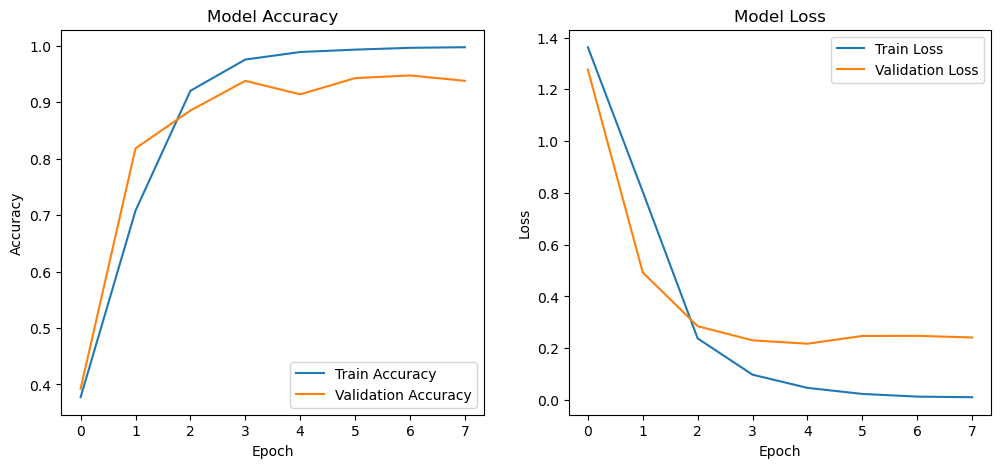

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization, SpatialDropout1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Assume X and y are your data and labels already preprocessed.
# y should be one-hot encoded if you're using categorical_crossentropy.

# 1. Split data: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=np.argmax(y, axis=1))
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=np.argmax(y_temp, axis=1))
# 0.1765 ~ 15% of original total (0.85 * 0.1765 ≈ 0.15)

# Model parameters
vocab_size = 2000
embedding_dim = 64
input_length = X.shape[1]
l2_reg = 1e-4

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    SpatialDropout1D(0.3),  # Dropout on embeddings
    
    Bidirectional(LSTM(64, kernel_regularizer=l2(l2_reg), recurrent_regularizer=l2(l2_reg), return_sequences=False)),
    BatchNormalization(),
    Dropout(0.5),  # Dropout to reduce overfitting
    
    Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(y.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

# Evaluation on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Epoch 1/50
58/58 - 10s - loss: 2.0501 - accuracy: 0.3050 - val_loss: 1.4111 - val_accuracy: 0.3214 - lr: 0.0010 - 10s/epoch - 172ms/step
Epoch 2/50
58/58 - 2s - loss: 1.3694 - accuracy: 0.4808 - val_loss: 1.3454 - val_accuracy: 0.5561 - lr: 0.0010 - 2s/epoch - 34ms/step
Epoch 3/50
58/58 - 2s - loss: 0.8570 - accuracy: 0.6588 - val_loss: 1.2140 - val_accuracy: 0.7934 - lr: 0.0010 - 2s/epoch - 35ms/step
Epoch 4/50
58/58 - 2s - loss: 0.5297 - accuracy: 0.8165 - val_loss: 1.0443 - val_accuracy: 0.7755 - lr: 0.0010 - 2s/epoch - 33ms/step
Epoch 5/50
58/58 - 2s - loss: 0.4156 - accuracy: 0.8762 - val_loss: 0.9379 - val_accuracy: 0.6709 - lr: 0.0010 - 2s/epoch - 35ms/step
Epoch 6/50
58/58 - 2s - loss: 0.3135 - accuracy: 0.9113 - val_loss: 0.8540 - val_accuracy: 0.6607 - lr: 0.0010 - 2s/epoch - 33ms/step
Epoch 7/50
58/58 - 2s - loss: 0.2609 - accuracy: 0.9403 - val_loss: 0.7303 - val_accuracy: 0.7143 - lr: 0.0010 - 2s/epoch - 34ms/step
Epoch 8/50
58/58 - 2s - loss: 0.2195 - accuracy: 0.9567 - v

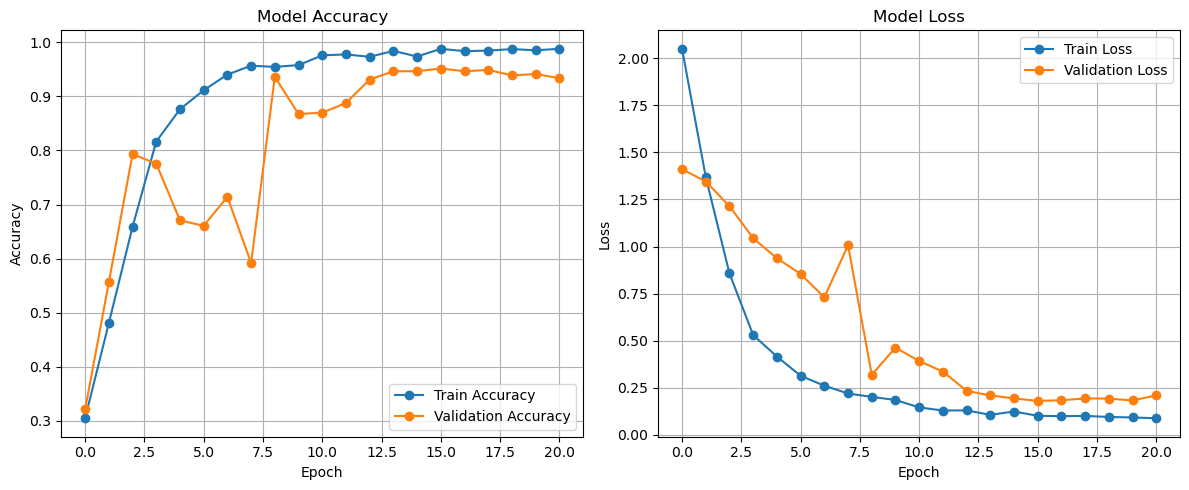

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nlpaug.augmenter.word as naw  # For augmentation

# ======================
# DOWNLOAD STOPWORDS
# ======================
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

# ======================
# LOAD DATASET
# ======================
df = pd.read_csv("Datas.csv")

# Rename columns for easier access
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
})

# ======================
# CLEAN TEXT FUNCTION
# ======================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# ======================
# GIBBERISH DETECTION
# ======================
def is_gibberish(text):
    text = str(text)
    if len(text) < 4:
        return True
    if re.fullmatch(r'(.)\1{2,}', text):
        return True
    if not re.search(r'[aeiouAEIOU]', text):
        return True
    if re.search(r'(?:[a-zA-Z]){5,}', text) and not re.search(r'\s', text):
        return True
    return False

# ======================
# MELT DATAFRAME
# ======================
df_melted = df.melt(
    value_vars=['happy', 'sad', 'angry', 'fear'],
    var_name='emotion',
    value_name='text'
)

# Drop empty or NaN values
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Clean and remove gibberish
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)
df_clean = df_melted[df_melted['is_gibberish'] == False].copy()
df_clean.drop(columns=['is_gibberish'], inplace=True)

# ======================
# AUGMENTATION
# ======================
augmenter = naw.SynonymAug(aug_src='wordnet')  # Basic synonym augmenter
AUGMENTATION_FACTOR = 4  # Number of augmentations per text

augmented_texts = []
augmented_emotions = []

for _, row in df_clean.iterrows():
    original_text = row['cleaned_text']
    emotion = row['emotion']
    try:
        augmented = augmenter.augment(original_text, n=AUGMENTATION_FACTOR)
        if isinstance(augmented, list):
            augmented_texts.extend(augmented)
            augmented_emotions.extend([emotion] * len(augmented))
        else:
            augmented_texts.append(augmented)
            augmented_emotions.append(emotion)
    except Exception:
        continue

# Create DataFrame for augmented data
df_aug = pd.DataFrame({
    'emotion': augmented_emotions,
    'cleaned_text': augmented_texts
})

# Combine original and augmented data
df_combined = pd.concat([df_clean[['emotion', 'cleaned_text']], df_aug], ignore_index=True)

# ======================
# TOKENIZATION + PADDING
# ======================
MAX_NUM_WORDS = 2000
MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_combined['cleaned_text'])

df_combined['token_sequence'] = tokenizer.texts_to_sequences(df_combined['cleaned_text'])

padded_sequences = pad_sequences(
    df_combined['token_sequence'],
    maxlen=MAX_SEQUENCE_LENGTH,
    padding='post',
    truncating='post'
)
df_combined['padded_sequence'] = padded_sequences.tolist()

# ======================
# ONE-HOT ENCODING
# ======================
one_hot_labels = pd.get_dummies(df_combined['emotion'], prefix='emotion')
df_combined = pd.concat([df_combined, one_hot_labels], axis=1)

X = padded_sequences
y = one_hot_labels.values

# ======================
# SAVE & PREVIEW
# ======================
df_combined.to_csv("final_augmented_emotions_onehot.csv", index=False)

print("\nSample cleaned & augmented data:")
print(df_combined[['emotion', 'cleaned_text', 'token_sequence', 'padded_sequence'] + list(one_hot_labels.columns)].head())

print("\nOne-hot columns:", list(one_hot_labels.columns))



Sample cleaned & augmented data:
  emotion                               cleaned_text  \
0   happy  boyfriend spoke yesterday hour feel happy   
1   happy                            eat talk mother   
2   happy              remember childhood experience   
3   happy                                   im happy   
4   happy                    excited see exam result   

               token_sequence  \
0  [129, 205, 173, 325, 3, 5]   
1               [222, 80, 45]   
2             [256, 719, 138]   
3                      [2, 5]   
4           [130, 34, 15, 75]   

                                     padded_sequence  emotion_angry  \
0  [129, 205, 173, 325, 3, 5, 0, 0, 0, 0, 0, 0, 0...              0   
1  [222, 80, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...              0   
2  [256, 719, 138, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
3  [2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
4  [130, 34, 15, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...              0   

   

In [3]:
# Before preprocessing (original data count)
original_data_count = df[['happy', 'sad', 'angry', 'fear']].notna().sum().sum()
print("Total data points before preprocessing:", original_data_count)

# After melting (all rows with text, before cleaning gibberish removal)
melted_data_count = df_melted.shape[0]
print("Total data points after melting:", melted_data_count)

# After dropping empty and NaN texts
non_empty_count = df_melted.dropna(subset=['text'])
non_empty_count = non_empty_count[non_empty_count['text'].str.strip() != ''].shape[0]
print("Data points after removing empty texts:", non_empty_count)

# After removing gibberish
clean_data_count = df_clean.shape[0]
print("Data points after cleaning and gibberish removal:", clean_data_count)

# After augmentation
augmented_data_count = df_aug.shape[0]
print("Augmented data points generated:", augmented_data_count)

# After combining original + augmented
combined_data_count = df_combined.shape[0]
print("Total data points after augmentation and combining:", combined_data_count)


Total data points before preprocessing: 560
Total data points after melting: 560
Data points after removing empty texts: 560
Data points after cleaning and gibberish removal: 522
Augmented data points generated: 2088
Total data points after augmentation and combining: 2610


In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple LSTM model
model = Sequential([
    Embedding(input_dim=2000, output_dim=64, input_length=X.shape[1]),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop]
)

# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50
59/59 [==============================] - 9s 40ms/step - loss: 1.3622 - accuracy: 0.3246 - val_loss: 1.2806 - val_accuracy: 0.4545
Epoch 2/50
59/59 [==============================] - 1s 18ms/step - loss: 0.8664 - accuracy: 0.6743 - val_loss: 0.5021 - val_accuracy: 0.8421
Epoch 3/50
59/59 [==============================] - 1s 17ms/step - loss: 0.2698 - accuracy: 0.9207 - val_loss: 0.2618 - val_accuracy: 0.9234
Epoch 4/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0853 - accuracy: 0.9776 - val_loss: 0.4713 - val_accuracy: 0.8852
Epoch 5/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0698 - accuracy: 0.9846 - val_loss: 0.1546 - val_accuracy: 0.9522
Epoch 6/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0221 - accuracy: 0.9957 - val_loss: 0.1591 - val_accuracy: 0.9426
Epoch 7/50
59/59 [==============================] - 1s 17ms/step - loss: 0.0222 - accuracy: 0.9947 - val_loss: 0.1577 - val_accuracy: 0.9522
Epoch 8/50
17

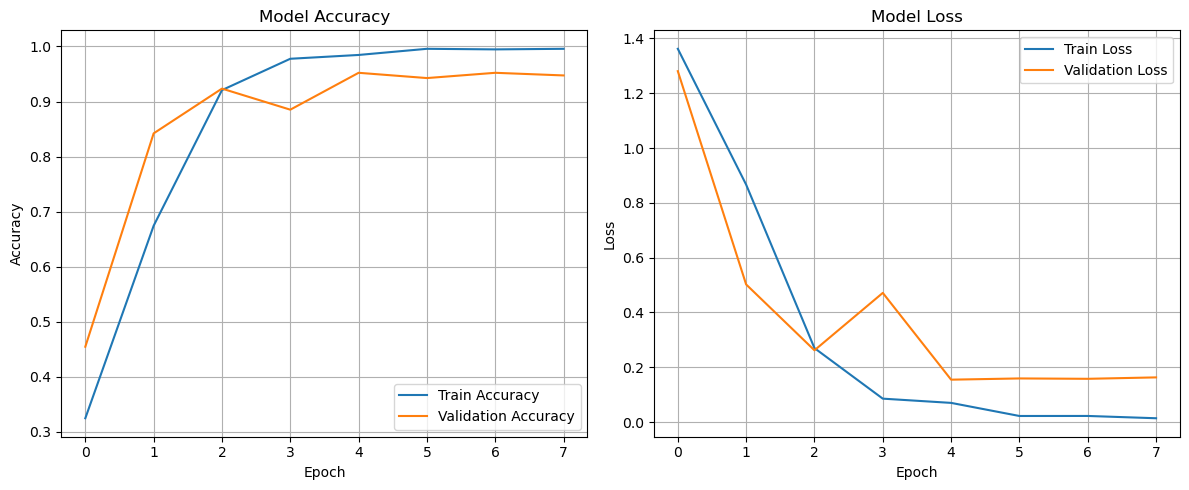

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization, SpatialDropout1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Assume X and y are your data and labels already preprocessed.
# y should be one-hot encoded if you're using categorical_crossentropy.

# 1. Split data: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=np.argmax(y, axis=1))
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=np.argmax(y_temp, axis=1))
# 0.1765 ~ 15% of original total (0.85 * 0.1765 ≈ 0.15)

# Model parameters
vocab_size = 2000
embedding_dim = 64
input_length = X.shape[1]
l2_reg = 1e-4

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    SpatialDropout1D(0.3),  # Dropout on embeddings
    
    Bidirectional(LSTM(64, kernel_regularizer=l2(l2_reg), recurrent_regularizer=l2(l2_reg), return_sequences=False)),
    BatchNormalization(),
    Dropout(0.5),  # Dropout to reduce overfitting
    
    Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(y.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

# Evaluation on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Epoch 1/50
58/58 - 9s - loss: 2.0815 - accuracy: 0.2990 - val_loss: 1.4192 - val_accuracy: 0.2551 - lr: 0.0010 - 9s/epoch - 163ms/step
Epoch 2/50
58/58 - 1s - loss: 1.4306 - accuracy: 0.4704 - val_loss: 1.3969 - val_accuracy: 0.3648 - lr: 0.0010 - 997ms/epoch - 17ms/step
Epoch 3/50
58/58 - 1s - loss: 0.8435 - accuracy: 0.6802 - val_loss: 1.3280 - val_accuracy: 0.5000 - lr: 0.0010 - 944ms/epoch - 16ms/step
Epoch 4/50
58/58 - 1s - loss: 0.5552 - accuracy: 0.8072 - val_loss: 1.2024 - val_accuracy: 0.6531 - lr: 0.0010 - 928ms/epoch - 16ms/step
Epoch 5/50
58/58 - 1s - loss: 0.3843 - accuracy: 0.8828 - val_loss: 1.0240 - val_accuracy: 0.7321 - lr: 0.0010 - 926ms/epoch - 16ms/step
Epoch 6/50
58/58 - 1s - loss: 0.3255 - accuracy: 0.9118 - val_loss: 0.8171 - val_accuracy: 0.8469 - lr: 0.0010 - 888ms/epoch - 15ms/step
Epoch 7/50
58/58 - 1s - loss: 0.2497 - accuracy: 0.9288 - val_loss: 0.6242 - val_accuracy: 0.8980 - lr: 0.0010 - 899ms/epoch - 15ms/step
Epoch 8/50
58/58 - 1s - loss: 0.2222 - accu

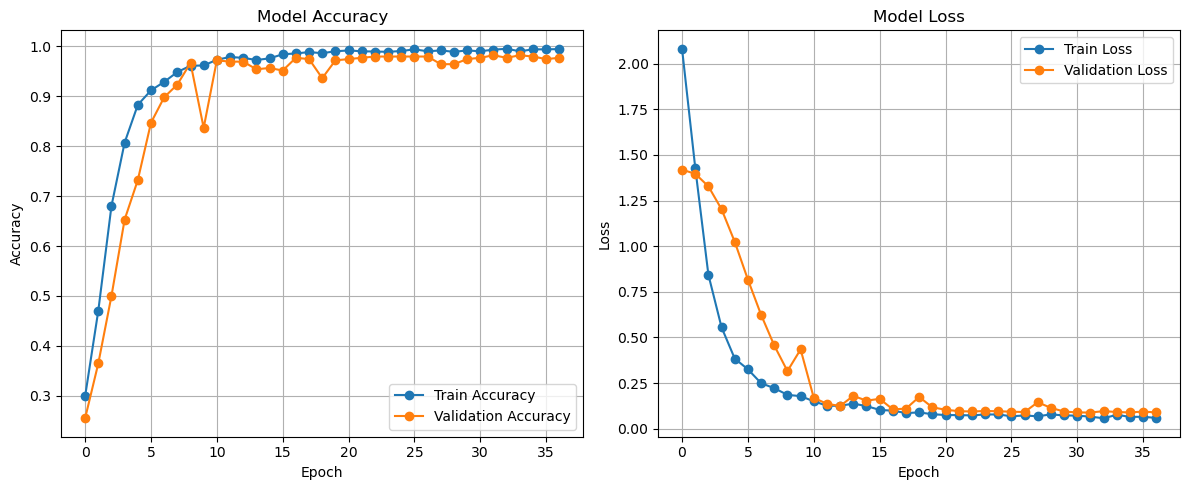

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Classification Report (Per Class):
              precision    recall  f1-score   support

       angry       0.95      0.96      0.95        96
        fear       0.99      1.00      1.00       100
       happy       0.97      0.96      0.96        98
         sad       0.94      0.93      0.93        98

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



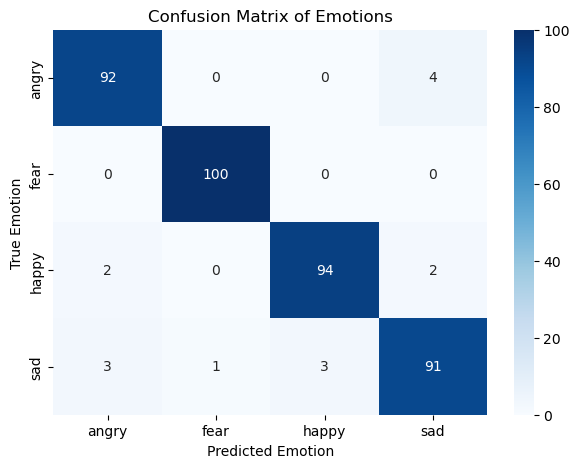

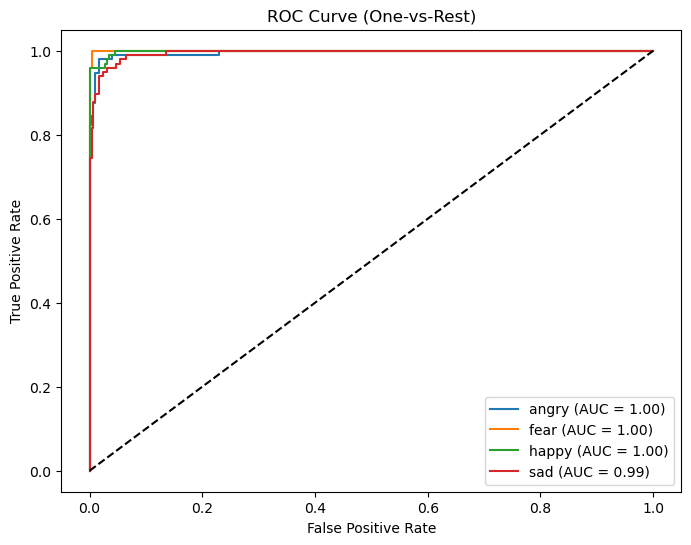

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# =======================
# CLASSIFICATION REPORT
# =======================
emotion_labels = list(one_hot_labels.columns)   # ['emotion_angry','emotion_fear','emotion_happy','emotion_sad']
emotion_labels_clean = [label.replace("emotion_", "") for label in emotion_labels]

print("\nClassification Report (Per Class):")
print(classification_report(y_true, y_pred, target_names=emotion_labels_clean))

# =======================
# CONFUSION MATRIX
# =======================
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels_clean,
            yticklabels=emotion_labels_clean)
plt.title("Confusion Matrix of Emotions")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

# =======================
# ROC & AUC (One-vs-Rest)
# =======================
# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_true, classes=range(len(emotion_labels_clean)))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{emotion_labels_clean[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)
emotion_labels = [label.replace("emotion_", "") for label in one_hot_labels.columns]

print("Confusion Matrix:\n", cm)

# Compute TP, TN, FP, FN for each class
metrics_dict = {}
for i, label in enumerate(emotion_labels):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FP + FN)
    metrics_dict[label] = {"TP": TP, "TN": TN, "FP": FP, "FN": FN}

# Display results
print("\nPer-Class TP, TN, FP, FN values:")
for label, values in metrics_dict.items():
    print(f"{label}: {values}")


Confusion Matrix:
 [[ 92   0   0   4]
 [  0 100   0   0]
 [  2   0  94   2]
 [  3   1   3  91]]

Per-Class TP, TN, FP, FN values:
angry: {'TP': 92, 'TN': 291, 'FP': 5, 'FN': 4}
fear: {'TP': 100, 'TN': 291, 'FP': 1, 'FN': 0}
happy: {'TP': 94, 'TN': 291, 'FP': 3, 'FN': 4}
sad: {'TP': 91, 'TN': 288, 'FP': 6, 'FN': 7}


In [6]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nlpaug.augmenter.word as naw  # For augmentation

# ======================
# DOWNLOAD STOPWORDS
# ======================
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

# ======================
# LOAD DATASET
# ======================
df = pd.read_csv("Datas.csv")

# Rename columns for easier access
df = df.rename(columns={
    'Please write a short text message when you were feeling HAPPY ? 😊\nE.g - "I got full marks on my test! So happy right now!"\n': 'happy',
    'Please write a short text message when you were feeling SAD ?  😢\nE.g - "I studied hard but still failed… I feel really down."': 'sad',
    'Please write a short text message when you were feeling ANGRY ?  😡\nE.g - "They blamed me for something I didn’t even do. I’m so angry !"': 'angry',
    'Please write a short text message when you were feeling FEAR ? 😨\nE.g - "I have a exam tomorrow, and I’m scared I’ll fail."': 'fear'
})

# ======================
# CLEAN TEXT FUNCTION
# ======================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# ======================
# GIBBERISH DETECTION
# ======================
def is_gibberish(text):
    text = str(text)
    if len(text) < 4:
        return True
    if re.fullmatch(r'(.)\1{2,}', text):
        return True
    if not re.search(r'[aeiouAEIOU]', text):
        return True
    if re.search(r'(?:[a-zA-Z]){5,}', text) and not re.search(r'\s', text):
        return True
    return False

# ======================
# MELT DATAFRAME
# ======================
df_melted = df.melt(
    value_vars=['happy', 'sad', 'angry', 'fear'],
    var_name='emotion',
    value_name='text'
)

# Drop empty or NaN values
df_melted = df_melted.dropna(subset=['text'])
df_melted = df_melted[df_melted['text'].str.strip() != '']

# Clean and remove gibberish
df_melted['cleaned_text'] = df_melted['text'].apply(clean_text)
df_melted['is_gibberish'] = df_melted['cleaned_text'].apply(is_gibberish)
df_clean = df_melted[df_melted['is_gibberish'] == False].copy()
df_clean.drop(columns=['is_gibberish'], inplace=True)

# ======================
# AUGMENTATION
# ======================
augmenter = naw.SynonymAug(aug_src='wordnet')  # Basic synonym augmenter
AUGMENTATION_FACTOR = 4  # Number of augmentations per text

augmented_texts = []
augmented_emotions = []

for _, row in df_clean.iterrows():
    original_text = row['cleaned_text']
    emotion = row['emotion']
    try:
        augmented = augmenter.augment(original_text, n=AUGMENTATION_FACTOR)
        if isinstance(augmented, list):
            augmented_texts.extend(augmented)
            augmented_emotions.extend([emotion] * len(augmented))
        else:
            augmented_texts.append(augmented)
            augmented_emotions.append(emotion)
    except Exception:
        continue

# Create DataFrame for augmented data
df_aug = pd.DataFrame({
    'emotion': augmented_emotions,
    'cleaned_text': augmented_texts
})

# Combine original and augmented data
df_combined = pd.concat([df_clean[['emotion', 'cleaned_text']], df_aug], ignore_index=True)

# ======================
# TOKENIZATION + PADDING
# ======================
MAX_NUM_WORDS = 2000
MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_combined['cleaned_text'])

df_combined['token_sequence'] = tokenizer.texts_to_sequences(df_combined['cleaned_text'])

padded_sequences = pad_sequences(
    df_combined['token_sequence'],
    maxlen=MAX_SEQUENCE_LENGTH,
    padding='post',
    truncating='post'
)
df_combined['padded_sequence'] = padded_sequences.tolist()

# ======================
# ONE-HOT ENCODING
# ======================
one_hot_labels = pd.get_dummies(df_combined['emotion'], prefix='emotion')
df_combined = pd.concat([df_combined, one_hot_labels], axis=1)

X = padded_sequences
y = one_hot_labels.values

# ======================
# SAVE & PREVIEW
# ======================
df_combined.to_csv("final_augmented_emotions_onehot.csv", index=False)

print("\nSample cleaned & augmented data:")
print(df_combined[['emotion', 'cleaned_text', 'token_sequence', 'padded_sequence'] + list(one_hot_labels.columns)].head())

print("\nOne-hot columns:", list(one_hot_labels.columns))



Sample cleaned & augmented data:
  emotion                               cleaned_text  \
0   happy  boyfriend spoke yesterday hour feel happy   
1   happy                            eat talk mother   
2   happy              remember childhood experience   
3   happy                                   im happy   
4   happy                    excited see exam result   

               token_sequence  \
0  [122, 194, 171, 332, 5, 4]   
1               [240, 81, 54]   
2             [262, 891, 172]   
3                      [2, 4]   
4           [149, 35, 13, 73]   

                                     padded_sequence  emotion_angry  \
0  [122, 194, 171, 332, 5, 4, 0, 0, 0, 0, 0, 0, 0...              0   
1  [240, 81, 54, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...              0   
2  [262, 891, 172, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
3  [2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              0   
4  [149, 35, 13, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...              0   

   

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization, SpatialDropout1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Assume X and y are your data and labels already preprocessed.
# y should be one-hot encoded if you're using categorical_crossentropy.

# 1. Split data: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=np.argmax(y, axis=1))
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=np.argmax(y_temp, axis=1))
# 0.1765 ~ 15% of original total (0.85 * 0.1765 ≈ 0.15)

# Model parameters
vocab_size = 2000
embedding_dim = 64
input_length = X.shape[1]
l2_reg = 1e-4

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
    SpatialDropout1D(0.3),  # Dropout on embeddings
    
    Bidirectional(LSTM(64, kernel_regularizer=l2(l2_reg), recurrent_regularizer=l2(l2_reg), return_sequences=False)),
    BatchNormalization(),
    Dropout(0.5),  # Dropout to reduce overfitting
    
    Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(y.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

# Evaluation on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Epoch 1/50
58/58 - 10s - loss: 2.0200 - accuracy: 0.2996 - val_loss: 1.4233 - val_accuracy: 0.2500 - lr: 0.0010 - 10s/epoch - 172ms/step
Epoch 2/50
58/58 - 1s - loss: 1.3196 - accuracy: 0.4803 - val_loss: 1.3922 - val_accuracy: 0.2934 - lr: 0.0010 - 1s/epoch - 19ms/step
Epoch 3/50
58/58 - 1s - loss: 0.7995 - accuracy: 0.7065 - val_loss: 1.3243 - val_accuracy: 0.4694 - lr: 0.0010 - 1s/epoch - 19ms/step
Epoch 4/50
58/58 - 1s - loss: 0.5442 - accuracy: 0.8193 - val_loss: 1.2350 - val_accuracy: 0.4821 - lr: 0.0010 - 1s/epoch - 19ms/step
Epoch 5/50
58/58 - 1s - loss: 0.4253 - accuracy: 0.8669 - val_loss: 1.0368 - val_accuracy: 0.6582 - lr: 0.0010 - 1s/epoch - 19ms/step
Epoch 6/50
58/58 - 1s - loss: 0.3115 - accuracy: 0.9250 - val_loss: 0.8659 - val_accuracy: 0.7372 - lr: 0.0010 - 1s/epoch - 19ms/step
Epoch 7/50
58/58 - 1s - loss: 0.2840 - accuracy: 0.9239 - val_loss: 0.6699 - val_accuracy: 0.8571 - lr: 0.0010 - 1s/epoch - 19ms/step
Epoch 8/50
58/58 - 1s - loss: 0.2164 - accuracy: 0.9573 - v

In [9]:
import numpy as np
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords

# =========================
# Ensure stopwords are downloaded
# =========================
import nltk
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

# =========================
# Use the same cleaning function as training
# =========================
def clean_text_user(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# =========================
# Emotion labels
# =========================
emotion_labels_clean = [label.replace("emotion_", "") for label in one_hot_labels.columns]

# =========================
# Function to predict emotion
# =========================
def predict_emotion(user_text):
    cleaned_text = clean_text_user(user_text)
    seq = tokenizer.texts_to_sequences([cleaned_text])
    padded_seq = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
    
    pred_probs = model.predict(padded_seq, verbose=0)
    pred_index = np.argmax(pred_probs)
    pred_emotion = emotion_labels_clean[pred_index]
    return pred_emotion

# =========================
# Get 4 user inputs
# =========================
print("Enter 4 text messages to detect emotions:")

for i in range(4):
    user_text = input(f"Text {i+1}: ")
    emotion = predict_emotion(user_text)
    print(f"Predicted Emotion: {emotion}\n")


Enter 4 text messages to detect emotions:
Text 1: I was eating a ice cream
Predicted Emotion: happy

Text 2: My loved one saw my messages but did not respond.
Predicted Emotion: sad

Text 3: When someone touch my ego
Predicted Emotion: angry

Text 4: Release exam results
Predicted Emotion: fear



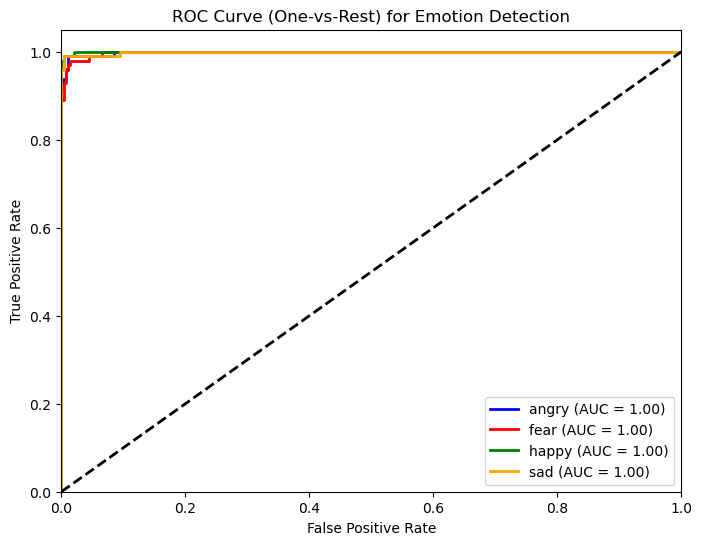

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# =========================
# Binarize the true labels for multi-class ROC
# =========================
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=range(y.shape[1]))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange']  # one color per emotion
emotion_labels_clean = [label.replace("emotion_", "") for label in one_hot_labels.columns]

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{emotion_labels_clean[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest) for Emotion Detection')
plt.legend(loc="lower right")
plt.show()
